<div align="center">
    <h4> Base R Plotting</h4>
    </div>

In [2]:
library(ggplot2)

In [3]:
str(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


**Histograms**

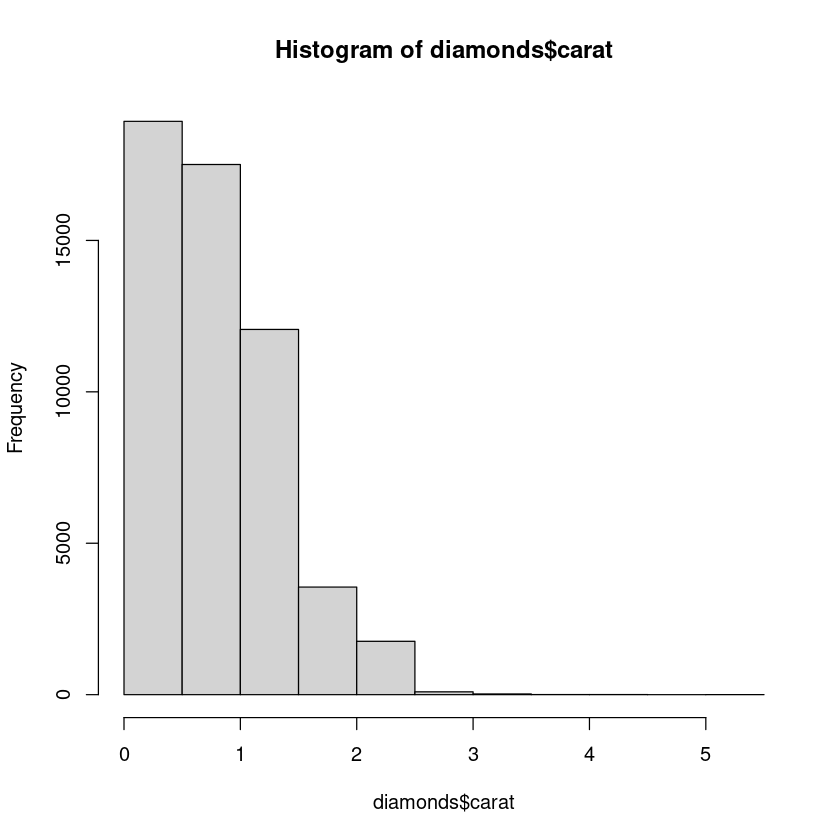

In [4]:
hist(diamonds$carat)

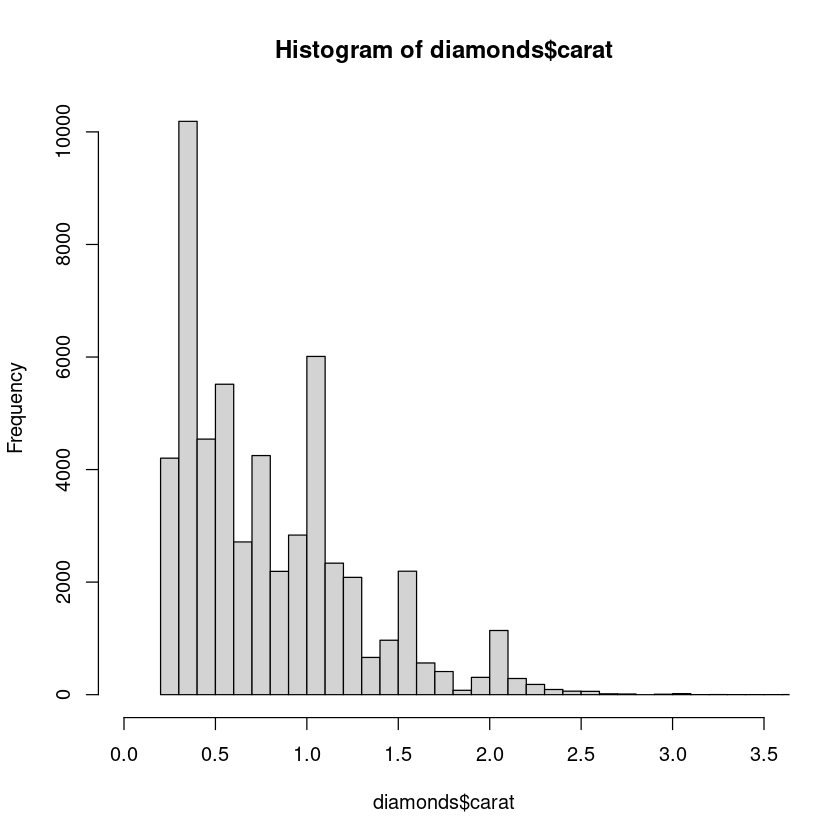

In [6]:
hist(diamonds$carat,
     breaks = 50,       # Group into 50 bins
     xlim = c(0,3.5))   # Limit the X-axis to the range 0-3.5

Let's check to see if any diamonds are larger than 3.5 carats.

In [7]:
subset(diamonds, carat > 3.5)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
3.65,Fair,H,I1,67.1,53,11668,9.53,9.48,6.38
4.01,Premium,I,I1,61.0,61,15223,10.14,10.10,6.17
4.01,Premium,J,I1,62.5,62,15223,10.02,9.94,6.24
4.00,Very Good,I,I1,63.3,58,15984,10.01,9.94,6.31
3.67,Premium,I,I1,62.4,56,16193,9.86,9.81,6.13
4.13,Fair,H,I1,64.8,61,17329,10.00,9.85,6.43
5.01,Fair,J,I1,65.5,59,18018,10.74,10.54,6.98
4.50,Fair,J,I1,65.8,58,18531,10.23,10.16,6.72
3.51,Premium,J,VS2,62.5,59,18701,9.66,9.63,6.03


**Boxplots**

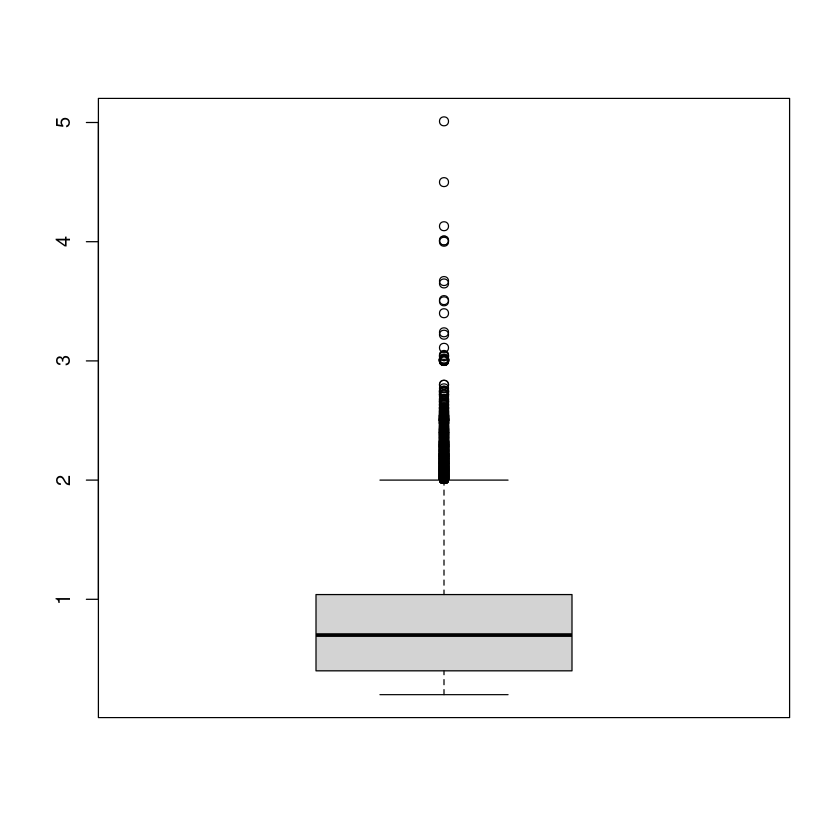

In [8]:
boxplot(diamonds$carat)

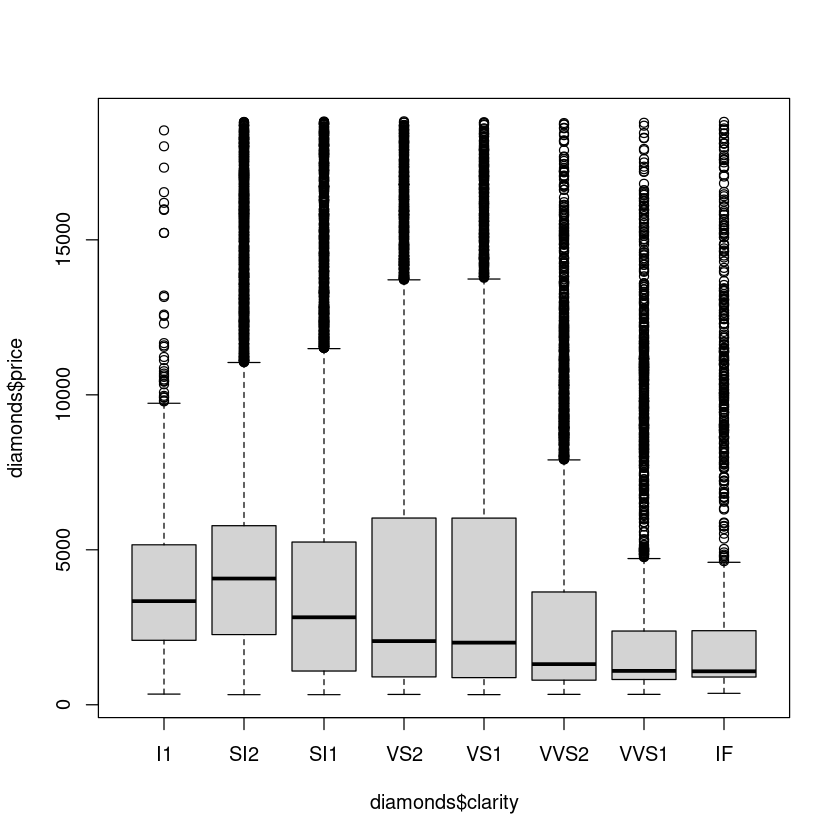

In [9]:
boxplot(diamonds$price ~ diamonds$clarity) # Plot price split on clarity*

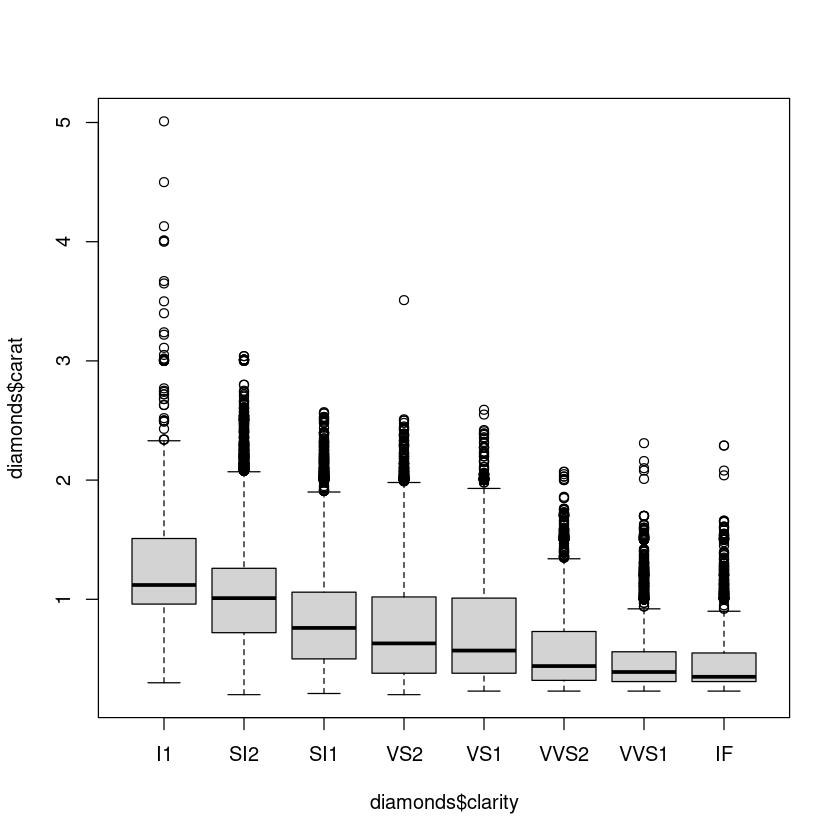

In [10]:
boxplot(diamonds$carat ~ diamonds$clarity)  # Plot of carat split on clarity

**Density Plots**

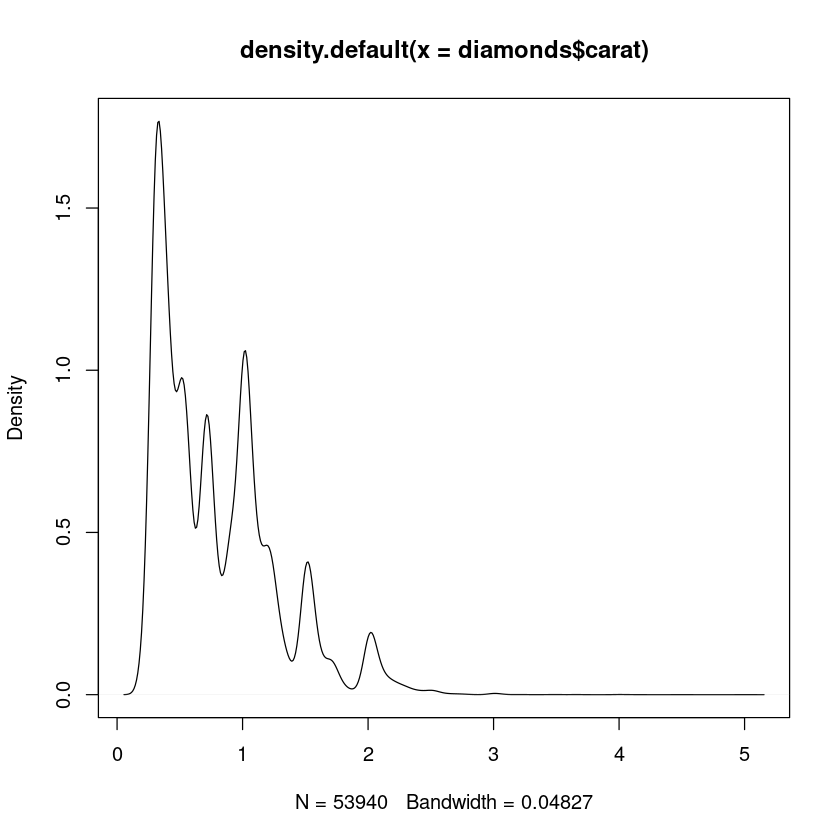

In [11]:
plot(density(diamonds$carat))

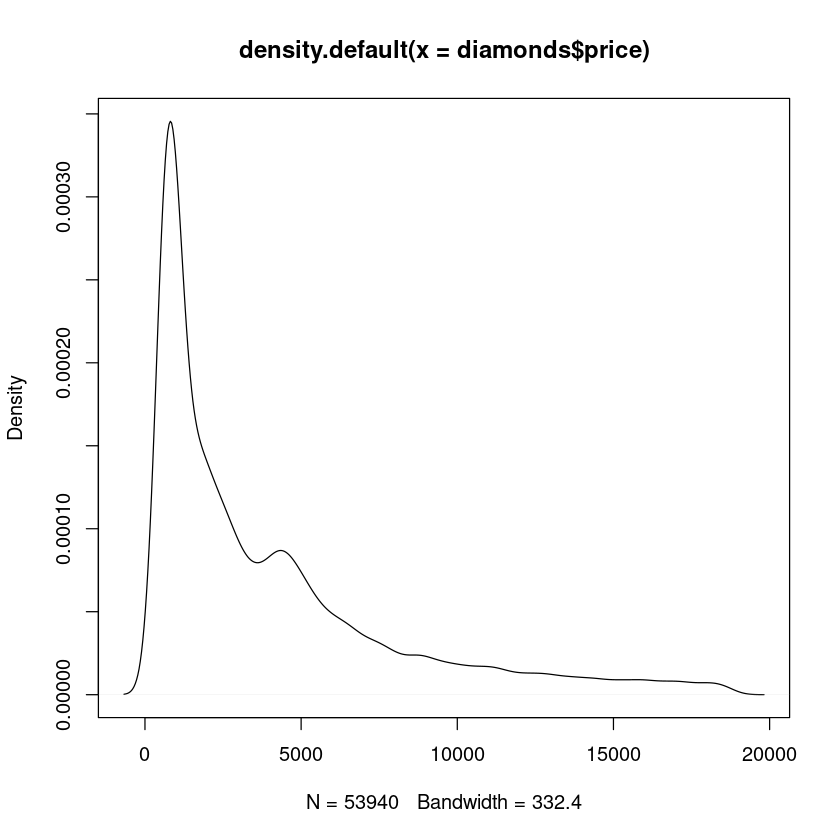

In [12]:
plot(density(diamonds$price))

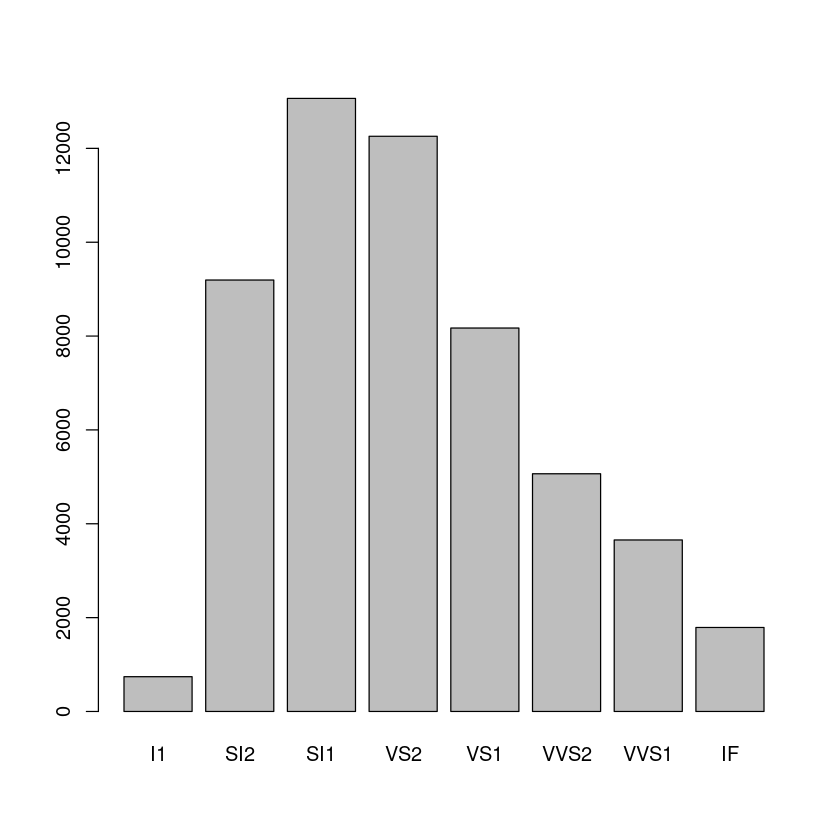

In [17]:
barplot(table(diamonds$clarity))

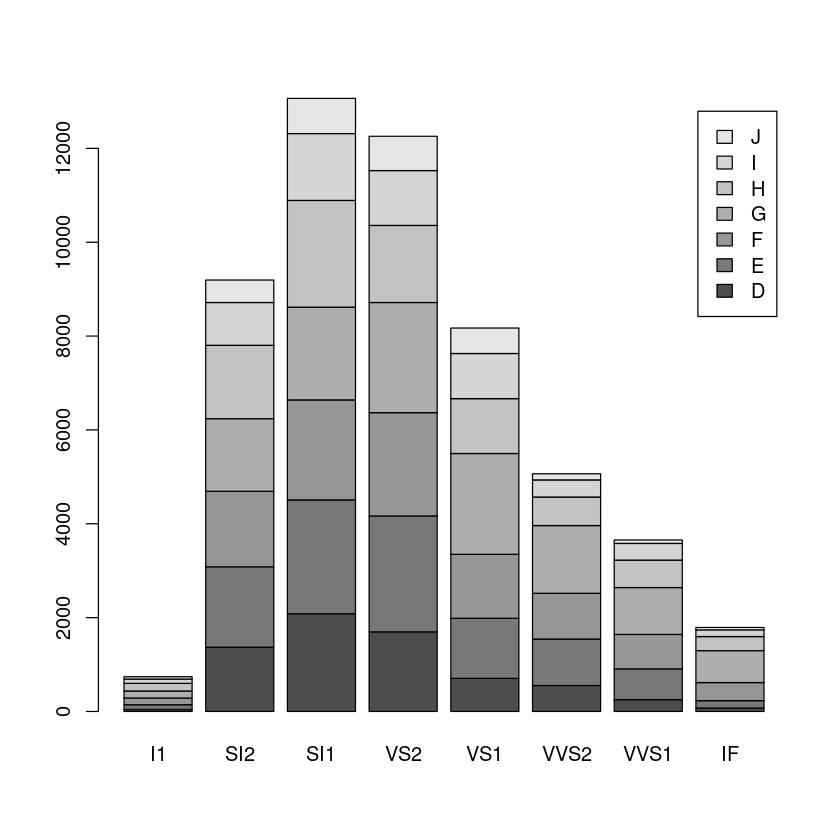

In [18]:
# Create a stacked barplot of clarity, with stacks based on diamond color
barplot( table(diamonds$color, diamonds$clarity),
       legend = levels(diamonds$color))               # Add a legend for diamond colors

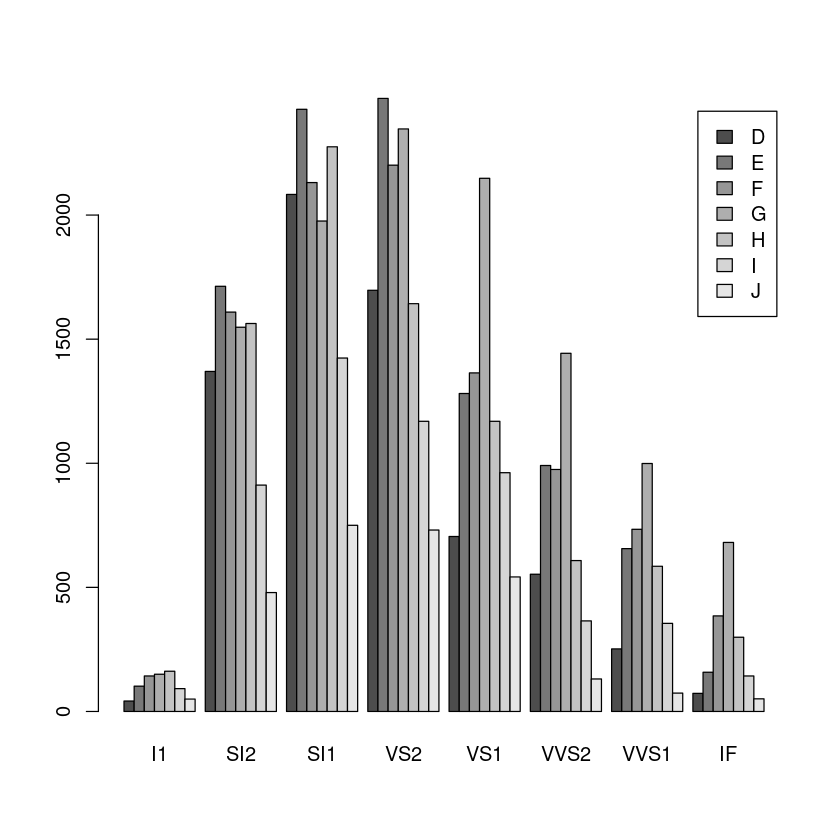

In [19]:
# Create a grouped barplot of clarity and color

barplot( table(diamonds$color, diamonds$clarity),
       legend = levels(diamonds$color),           
       beside = TRUE)                             # Group instead of stacking

**Scatterplots**

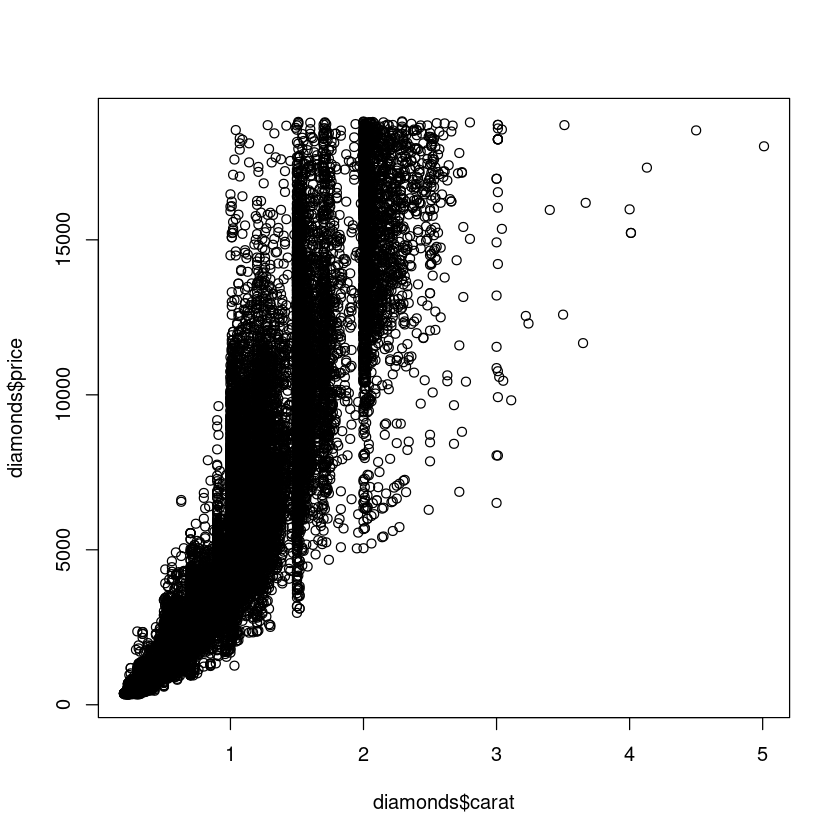

In [21]:
plot(diamonds$carat, 
     diamonds$price)   # Scatter plot of carat and price

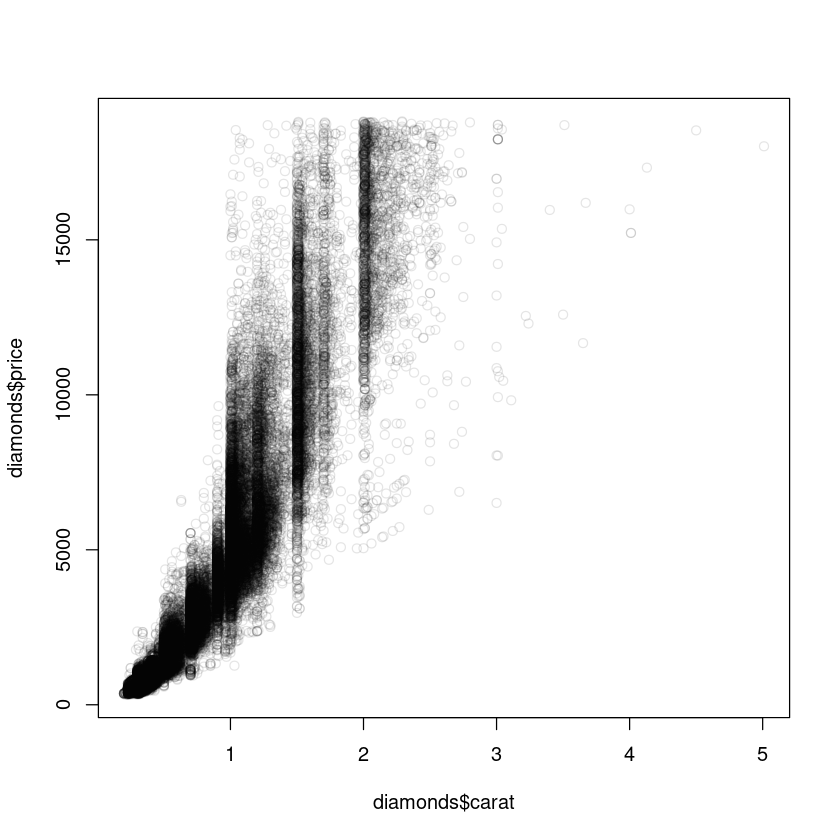

In [22]:
# Recreate the plot above, but use the col option with rgb() to set alpha
plot(diamonds$carat, 
     diamonds$price,
     col = rgb(red = 0, green = 0, blue = 0, alpha = 0.1))

**Line Plots**

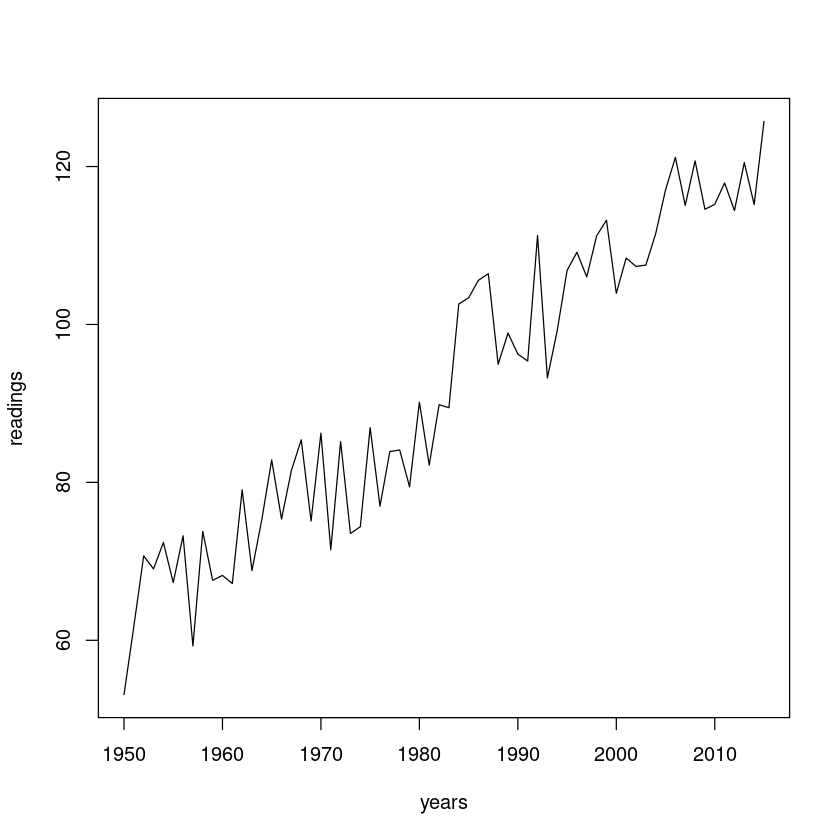

In [23]:
years <- seq(1950,2015,1)                # Create some dummy data
readings <- (years-1900) + runif(66,0,20)

plot(years, readings, type="l")          # Make a line plot of the data

**Plot Parameters**

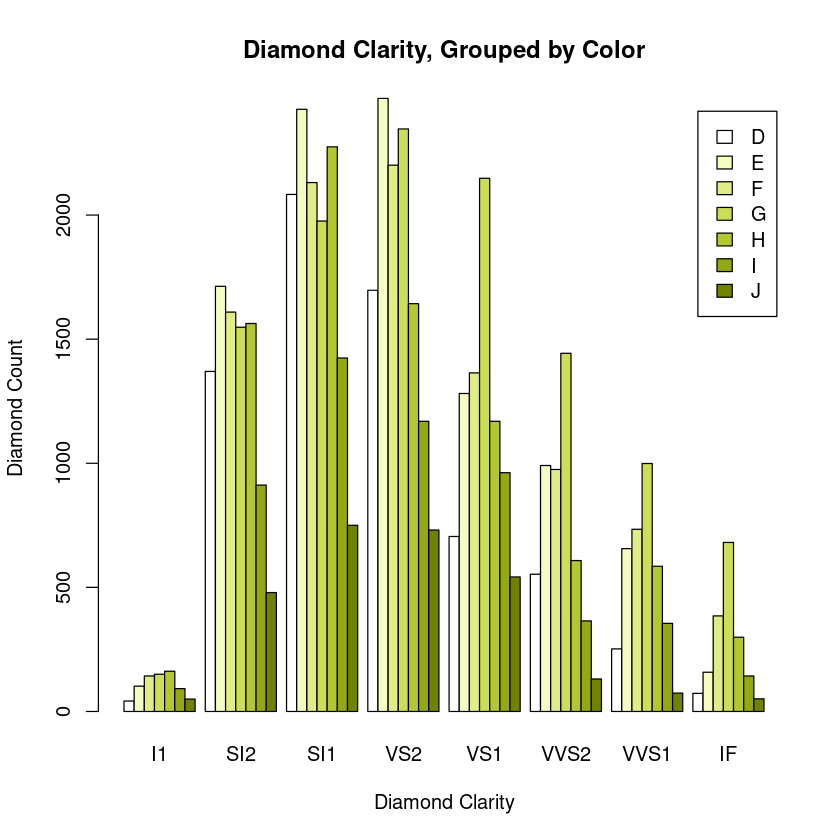

In [24]:
# Remake the grouped barplot
barplot(table(diamonds$color, diamonds$clarity),
       legend = levels(diamonds$color),           
       beside = TRUE,
       xlab = "Diamond Clarity",                      # Add a label to the X-axis
       ylab = "Diamond Count",                        # Add a label to the Y-axis
       main = "Diamond Clarity, Grouped by Color",    # Add a plot title
       col = c("#FFFFFF","#F5FCC2","#E0ED87","#CCDE57",     # Add color*
              "#B3C732","#94A813","#718200") )

**Adding Features to Plots**

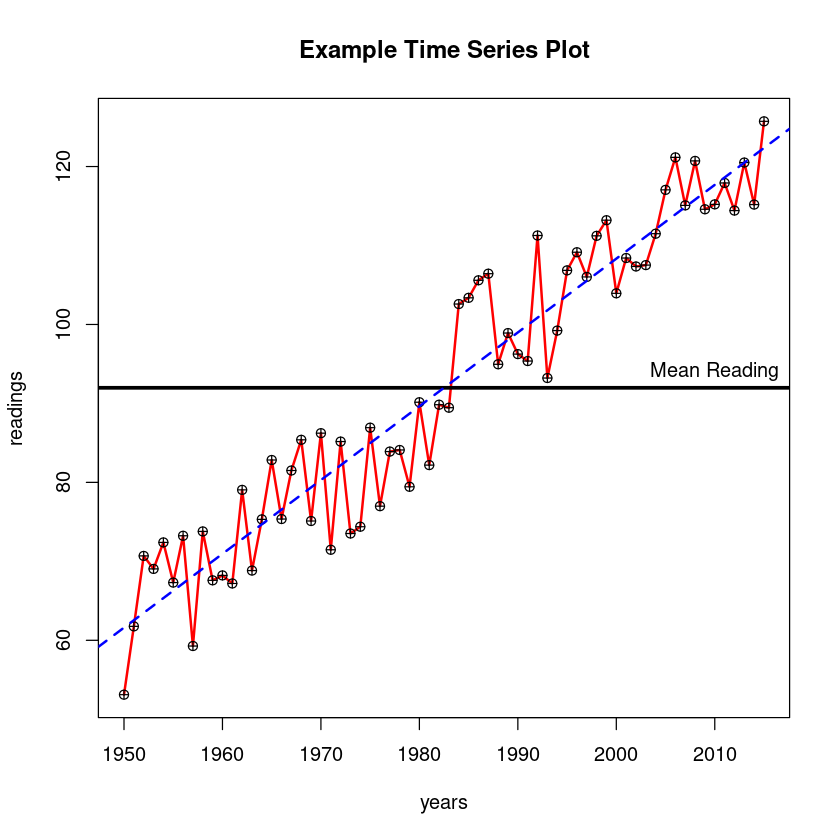

In [25]:
plot(years, readings, type="l", 
                      col="red",                            # Color the line red
                      lwd="2",                              # Increase line width
                      main= "Example Time Series Plot")     # Add plot title   

points(x = years, y = readings,    # Draw points at specified coordinates
        pch=10 )                   # Set point symbol

abline(a = mean(readings),         # Draw a line with Y-intercept a
       b= 0,                       # And slope b
       lwd="3")                    # Set line width

text(x=2010, y=mean(readings)+2,   # Add text at specified coordinates           
     labels="Mean Reading")        # Text to add

abline( lm(readings ~ years),      # Create a line based on a linear model*
       col = "blue",               # Set color
       lty = "dashed",             # Set line type
       lwd = 2)                    # Set line width